In [9]:
import numpy as np
! kaggle competitions download -c spaceship-titanic


  0%|          | 0.00/299k [00:00<?, ?B/s]
100%|##########| 299k/299k [00:00<00:00, 2.91MB/s]
100%|##########| 299k/299k [00:00<00:00, 2.91MB/s]


In [11]:
import zipfile

with zipfile.ZipFile('spaceship-titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [1]:
import pandas as pd

C:\Users\steve\.conda\envs\workspace\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\steve\.conda\envs\workspace\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\steve\.conda\envs\workspace\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
raw_df = pd.read_csv('train.csv')

In [14]:
len(raw_df)

8693

In [69]:
raw_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Purchased_FoodCourt,Purchased_Spa,Purchased_RoomService,Purchased_ShoppingMall,Purchased_VRDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,0,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,0,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,0,0


In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [17]:
raw_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


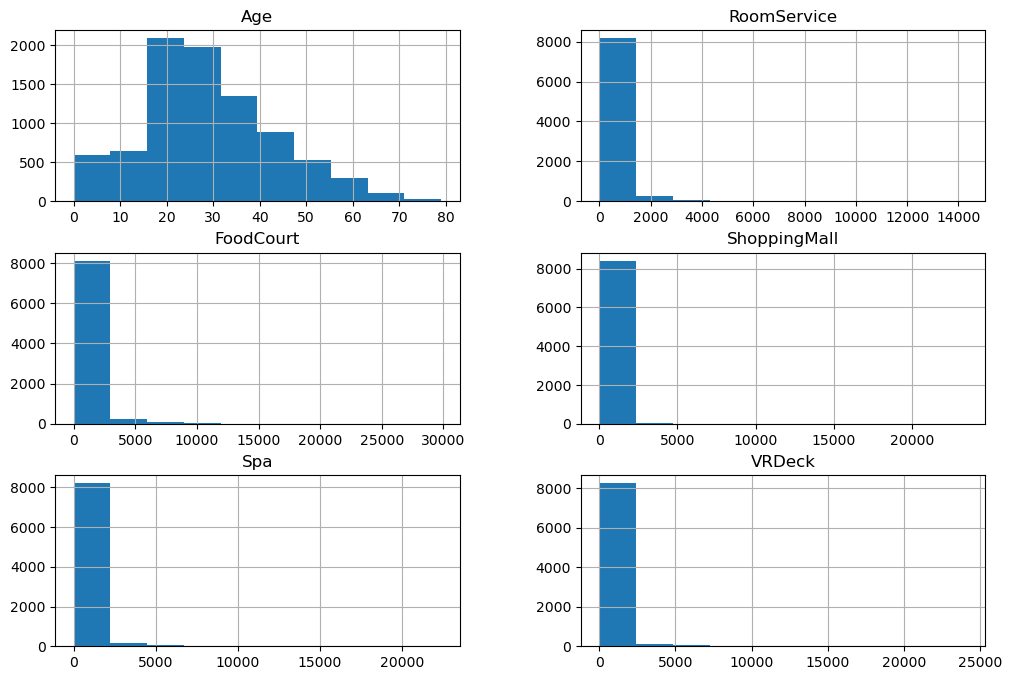

In [54]:
import matplotlib.pyplot as plt

raw_df.hist(bins=10, figsize=(12, 8))
plt.show()

In [91]:
from pandas.api.types import is_object_dtype

purchase_cols = ['FoodCourt', 'Spa', 'RoomService', 'ShoppingMall', 'VRDeck']
bool_cols = ['CryoSleep', 'VIP']
categorical_cols = ['HomePlanet', 'Destination']
cabin_raw_col = 'Cabin'
cabin_cols = ['Cabin_deck', 'Cabin_num', 'Cabin_side']


def handle_purchasing_data(df):
    for col in purchase_cols:
        df[f'Purchased_{col}'] = (df[col] == 1).astype(int)
    return df.drop(purchase_cols, axis=1)


def handle_binary_data(df):
    for col in bool_cols:
        df[col] = df[col].fillna(df[col].median()).astype(int)
    return df


def handle_categorical_data(df):
    for col in categorical_cols:
        df = df.join(pd.get_dummies(df[col], prefix=col))
        df = df.drop(col, axis=1)
    return df


def handle_cabin_data(df):
    df[cabin_cols] = df[cabin_raw_col].str.split('/', expand=True)
    df = df.drop(cabin_raw_col, axis=1)

    for col in cabin_cols:
        df[col] = df[col].fillna(method='bfill')

    df['Cabin_num'] = df['Cabin_num'].astype(int)

    for col in cabin_cols:
        if is_object_dtype(df[col].dtype):
            df = df.join(pd.get_dummies(df[col], prefix=col))
            df = df.drop(col, axis=1)
    return df

In [147]:
df = raw_df.copy()
df = handle_purchasing_data(df)
df = handle_binary_data(df)
df = handle_categorical_data(df)
df = handle_cabin_data(df)
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.drop(['PassengerId', 'Name'], axis=1)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int32  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int32  
 3   Transported                8693 non-null   bool   
 4   Purchased_FoodCourt        8693 non-null   int32  
 5   Purchased_Spa              8693 non-null   int32  
 6   Purchased_RoomService      8693 non-null   int32  
 7   Purchased_ShoppingMall     8693 non-null   int32  
 8   Purchased_VRDeck           8693 non-null   int32  
 9   HomePlanet_Earth           8693 non-null   uint8  
 10  HomePlanet_Europa          8693 non-null   uint8  
 11  HomePlanet_Mars            8693 non-null   uint8  
 12  Destination_55 Cancri e    8693 non-null   uint8  
 13  Destination_PSO J318.5-22  8693 non-null   uint8

In [149]:
df.describe()

,CryoSleep,Age,VIP,Purchased_FoodCourt,Purchased_Spa,Purchased_RoomService,Purchased_ShoppingMall,Purchased_VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,...,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.349362,28.790291,0.022892,0.013344,0.016795,0.013459,0.017600,0.015990,0.529391,0.245140,...,0.030139,0.091683,0.087887,0.056137,0.102841,0.329921,0.300702,0.000690,0.495571,0.504429
std,0.476796,14.341404,0.149568,0.114750,0.128510,0.115237,0.131501,0.125443,0.499164,0.430195,...,0.170980,0.288594,0.283146,0.230200,0.303769,0.470211,0.458590,0.026264,0.500009,0.500009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,79.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
corr_matrix = df.corr()
corr_matrix['Transported'].sort_values(ascending=False)

Transported                  1.000000
CryoSleep                    0.460132
HomePlanet_Europa            0.176916
Cabin_deck_B                 0.145592
Cabin_deck_C                 0.110704
Destination_55 Cancri e      0.108722
Cabin_side_S                 0.104279
HomePlanet_Mars              0.019544
Cabin_deck_G                 0.014815
Destination_PSO J318.5-22    0.000092
Cabin_deck_A                -0.002623
Cabin_deck_T                -0.017712
Cabin_deck_D                -0.034752
VIP                         -0.037261
Purchased_RoomService       -0.037785
Purchased_Spa               -0.038546
Purchased_VRDeck            -0.042194
Cabin_num                   -0.046043
Purchased_FoodCourt         -0.065007
Purchased_ShoppingMall      -0.070084
Age                         -0.074233
Cabin_deck_F                -0.089740
Destination_TRAPPIST-1e     -0.094700
Cabin_deck_E                -0.095620
Cabin_side_P                -0.104279
HomePlanet_Earth            -0.169019
Name: Transp

Normalize 'Age' feature

In [152]:
import numpy as np
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
age = np.asarray(df['Age'])
age = age.reshape(-1, 1)

std_scaler.fit(age)
df['Age'] = std_scaler.transform(age)

Split dataset, 500 for validation and 500 for testing

In [153]:
from sklearn.model_selection import train_test_split

X = df.drop('Transported', axis=1)
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=500, random_state=42)

## Logistic classifier

In [154]:
from sklearn.linear_model import LogisticRegressionCV

logit_clf = LogisticRegressionCV(max_iter=200, random_state=42)
logit_clf.fit(X_train, y_train)
print('Validation score:', logit_clf.score(X_val, y_val))

Validation score: 0.718


## Decision tree classifier

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [i for i in range(1, 11)]}

tree_clf = DecisionTreeClassifier(random_state=42)

grid_tree_clf = GridSearchCV(tree_clf, param_grid=param_grid)
grid_tree_clf.fit(X_train, y_train)

print('Best params:', grid_tree_clf.best_params_)
print('Best train score:', grid_tree_clf.best_score_)
print('Best validation score:', grid_tree_clf.score(X_val, y_val))

Best params: {'max_depth': 7}
Best train score: 0.7406725526429858
Best validation score: 0.758


## Extra tree classifier

In [173]:
from sklearn.tree import ExtraTreeClassifier

extra_tree_clf = ExtraTreeClassifier(random_state=42)
extra_tree_clf.fit(X_train, y_train)
extra_tree_clf.score(X_val, y_val)

0.692

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

param_grid = {'n_estimators': [100, 200, 500, 1000],
              'max_samples': [i for i in range(100, 1001, 100)]}

bag_et_clf = BaggingClassifier(ExtraTreeClassifier(random_state=42),
                               random_state=42)
grid_bag_et_clf = GridSearchCV(bag_et_clf, param_grid=param_grid)
grid_bag_et_clf.fit(X_train, y_train)

print('Best params:', grid_bag_et_clf.best_params_)
print('Best train score:', grid_bag_et_clf.best_score_)
print('Best validation score:', grid_bag_et_clf.score(X_val, y_val))

Best params: {'max_samples': 800, 'n_estimators': 100}
Best train score: 0.7473009934169335
Best validation score: 0.756


## Random forest classifier

In [178]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [i for i in range(1, 11)],
              'n_estimators': [100, 200, 500, 1000]}

tree_clf = RandomForestClassifier(random_state=42)

grid_forest_clf = GridSearchCV(tree_clf, param_grid=param_grid)
grid_forest_clf.fit(X_train, y_train)

print('Best params:', grid_forest_clf.best_params_)
print('Best train score:', grid_forest_clf.best_score_)
print('Best validation score:', grid_forest_clf.score(X_val, y_val))

Best params: {'max_depth': 9, 'n_estimators': 200}
Best train score: 0.7526299735274709
Best validation score: 0.756


KeyboardInterrupt: 

## SVM classifier

In [163]:
from sklearn.svm import SVC

param_grid = {
    'C': [5, 10, 20],
    'degree': [i for i in range(1, 6)]
}

svc = SVC(kernel='poly', random_state=42)

grid_svc = GridSearchCV(svc, param_grid=param_grid)
grid_svc.fit(X_train, y_train)

print('Best params:', grid_svc.best_params_)
print('Best train score:', grid_svc.best_score_)
print('Best validation score:', grid_svc.score(X_val, y_val))

Best params: {'C': 20, 'degree': 5}
Best train score: 0.5531001080701078
Best validation score: 0.546


MLP classifier

In [168]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
241/241 [==============================] - 3s 7ms/step - loss: 3.2884 - accuracy: 0.5301 - val_loss: 2.2695 - val_accuracy: 0.5200
Epoch 2/30
241/241 [==============================] - 2s 7ms/step - loss: 0.9708 - accuracy: 0.5753 - val_loss: 1.5561 - val_accuracy: 0.5420
Epoch 3/30
241/241 [==============================] - 2s 7ms/step - loss: 0.8579 - accuracy: 0.6017 - val_loss: 0.8455 - val_accuracy: 0.5800
Epoch 4/30
241/241 [==============================] - 2s 7ms/step - loss: 0.8056 - accuracy: 0.6230 - val_loss: 0.9330 - val_accuracy: 0.6060
Epoch 5/30
241/241 [==============================] - 2s 7ms/step - loss: 0.8003 - accuracy: 0.6360 - val_loss: 0.5856 - val_accuracy: 0.7200
Epoch 6/30
241/241 [==============================] - 2s 7ms/step - loss: 0.7260 - accuracy: 0.6605 - val_loss: 1.2284 - val_accuracy: 0.6180
Epoch 7/30
241/241 [==============================] - 2s 7ms/step - loss: 0.7275 - accuracy: 0.6587 - val_loss: 0.7196 - val_accuracy: 0.6100
Epoch 

## Voting classifier

In [172]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', logit_clf),
        ('rf', grid_forest_clf)
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)
voting_clf.score(X_val, y_val)

0.744